### NAMA : MUHAMMAD RAHARDIAN BAIHAQI
### ASAL : UIN SGD BANDUNG
### TUGAS 1 MAKERINDO

###SETUP & IMPORT LIBRARY

In [101]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, make_scorer


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")


### DATA PREPARATION

In [65]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes





### VISUALISASI DISTRIBUSI CHURN

In [66]:
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


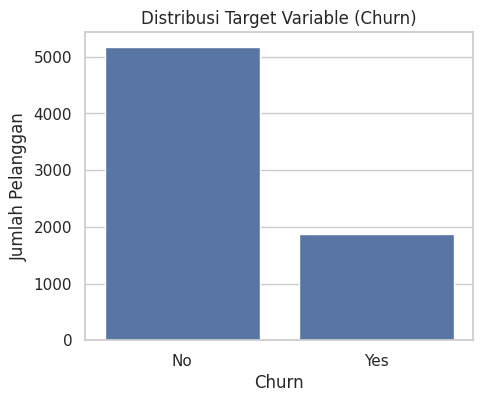

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Churn")
plt.title("Distribusi Target Variable (Churn)")
plt.xlabel("Churn")
plt.ylabel("Jumlah Pelanggan")
plt.show()




### DATA PREPROCESSING

In [67]:
df = df.drop("customerID", axis=1, errors="ignore")


In [68]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-61331631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [47]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [69]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numerical_cols


(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

### SPLIT TRAIN TEST

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### PIPELINE MODEL 1 - LOGISTIC REGRESSION

In [88]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


### TRAINING LOGISTIC REGRESSION

In [90]:
log_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=3000,
            solver="lbfgs"
        ))
    ]
)

log_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=3000))])

### EVALUATION – LOGISTIC REGRESSION

In [74]:
y_pred_log = log_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



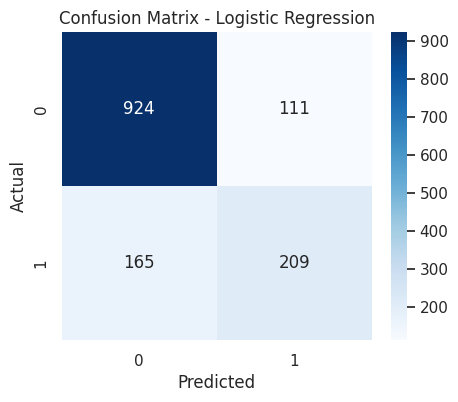

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_log),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### MODEL 2 – RANDOM FOREST (PEMBADING)

In [91]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=100,
            random_state=42
        ))
    ]
)

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

### EVALUATION – RANDOM FOREST

In [92]:
y_pred_rf = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7814052519517388
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.61      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



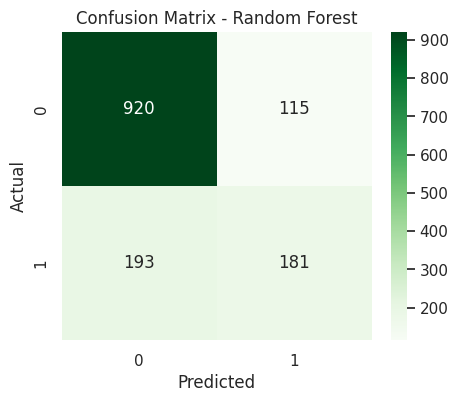

In [56]:
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### HYPERPARAMETER TUNING

In [102]:
recall_yes = make_scorer(recall_score, pos_label="Yes")


In [103]:
param_grid = {
    "model__C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    log_pipeline,
    param_grid,
    scoring=recall_yes,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                                        ('num',
                                                                         'passthrough',
                                                                         Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                                       ('model',
                                        LogisticRegression(max_iter=3000))]),
             n_jobs=-1, param_grid={'model__C': [0.01, 0.1, 1, 10]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Yes))

In [104]:
best_model = grid.best_estimator_
grid.best_params_


{'model__C': 1}

In [ ]:
erk

### EVALUATION – MODEL TERBAIK

In [98]:
y_pred_best = best_model.predict(X_test)

print("Tuned Logistic Regression")
print(classification_report(y_test, y_pred_best))


Tuned Logistic Regression
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1035
         Yes       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### PERBANDINGAN MODEL

In [99]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.804116
1,Random Forest,0.781405


In [84]:
feature_names = best_model.named_steps["preprocess"].get_feature_names_out()
coefficients = best_model.named_steps["model"].coef_[0]

importance_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients
}).sort_values(by="coefficient", ascending=False)

importance_df.head(10)


,feature,coefficient
32,cat__Contract_Month-to-month,0.367168
39,cat__PaymentMethod_Electronic check,0.239481
14,cat__OnlineSecurity_No,0.221070
23,cat__TechSupport_No,0.215378
12,cat__InternetService_Fiber optic,0.177553
36,cat__PaperlessBilling_Yes,0.164244
41,num__SeniorCitizen,0.130991
6,cat__PhoneService_No,0.128793
9,cat__MultipleLines_No phone service,0.128793
17,cat__OnlineBackup_No,0.107607
